<a href="https://colab.research.google.com/github/jgmzur29/PetroSpeachAnalisys/blob/main/Speachanalisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#import requests for web Scrapping
import pandas as pd
import numpy as np
import requests as rq
import io
import collections

In [18]:
#import matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt

In [19]:
#import k-means from clustering stage
from PIL import Image
from matplotlib import rcParams

In [20]:
texto = open('/content/discursoPresidencial.txt', 'r', encoding='latin-1')
mensaje = texto.read()


In [21]:
#library for Wordcloud
!pip -q install wordcloud

In [22]:
!pip -q install stop-words

In [23]:
import stop_words
#This is to add the words that we want to ignore
from stop_words import get_stop_words
#we clarify that we need the spanish stopwords
stop_words_es = get_stop_words('es')

In [24]:
from wordcloud import WordCloud, STOPWORDS
print('WordCloud is installed') #just to check

WordCloud is installed


In [43]:
stop_words = ["Colombia.", "año", "hoy", "debe", "para", "por", "el", "en", "si", "aqui", "dice", "solo", "Es", "El", "No", "la", "La", "no", "que", "Que"] + stop_words_es
#initiate wordCloud object
speachPetro = WordCloud (
    background_color='white',
    max_words=2000,
    stopwords=stop_words
)

#generate the wordCloud
speachPetro.generate(mensaje)

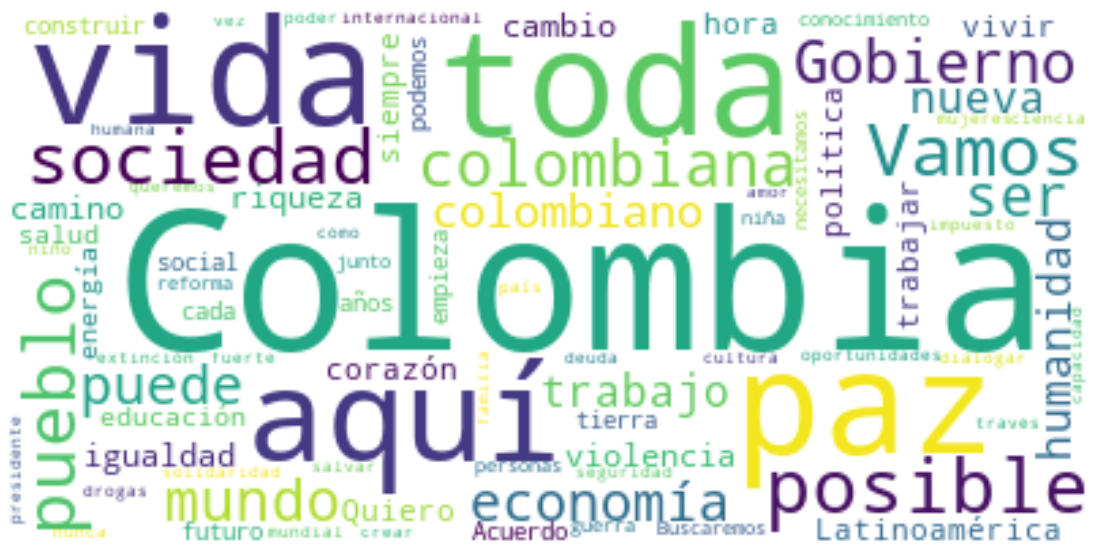

In [34]:
#display the wordCLoud
plt.imshow(speachPetro, interpolation='bilinear')
plt.axis('off')
plt.show()

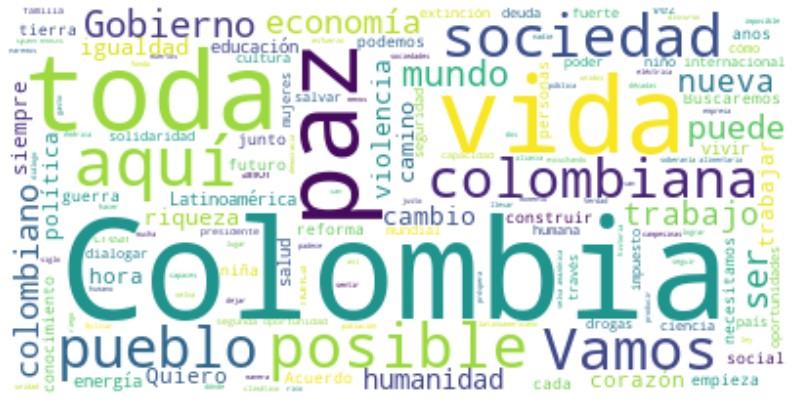

In [35]:
#re-generate the wordCloud
speachPetro.generate(mensaje)

#display the cloud properly
fig= plt.figure()
#set width
fig.set_figwidth(14)
#set height
fig.set_figheight(18)

plt.imshow(speachPetro, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
mask = np.array(Image.open('/content/croquisColombia.png'))
mask[mask == 1] =25
print('Image downloaded') #just to check

Image downloaded


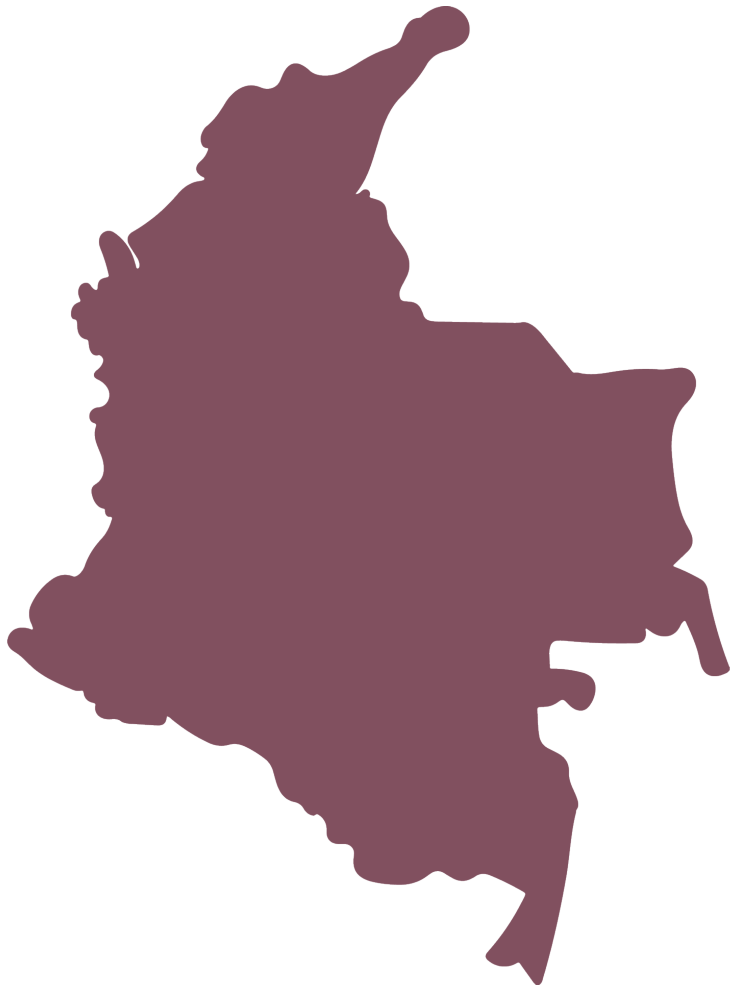

In [37]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

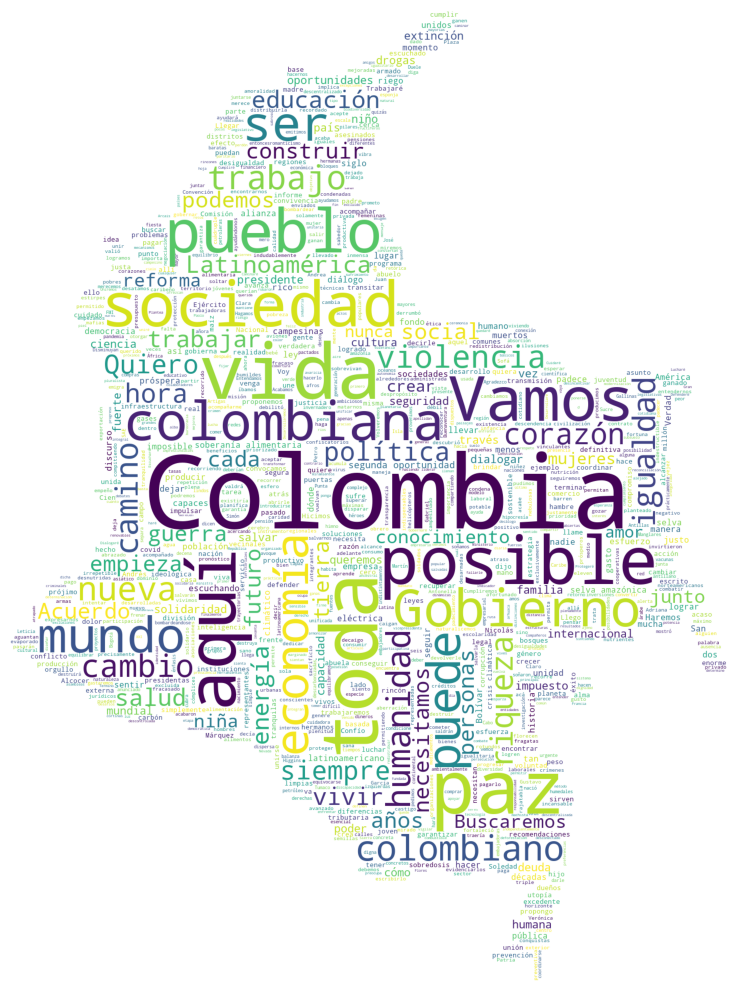

In [38]:
speachPetro = WordCloud(background_color='white',
                        max_words=2000,
                        stopwords=stop_words,
                        mask = mask,
                        )
speachPetro.generate(mensaje)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(speachPetro)
plt.axis('off')
plt.show()

In [39]:
filtered_words = [word for word in mensaje.split() if word not in stop_words]
counted_words = collections.Counter(filtered_words)

words = []
counts = []

for letter, count in counted_words.most_common(10):
  words.append(letter)
  counts.append(count)

<BarContainer object of 10 artists>

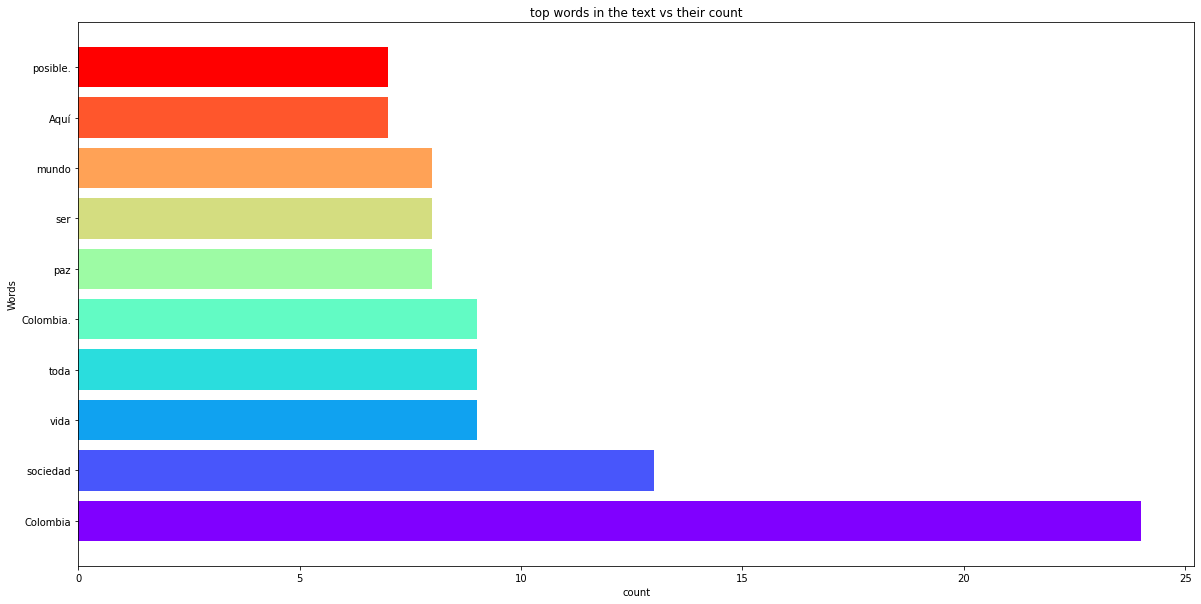

In [44]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] =20, 10

plt.title('top words in the text vs their count')
plt.xlabel('count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)